# Анализ фондового рынка. 

<b>Описание проекта</b><br>
Из импортированных файлов  с информацией о динамике цен акций на фондовом рынке необходимо собрать датафрейм, осуществить предобработку, добавить метрики и провести исследовательский анализ цены за последние 3 года. В исследовании использовать скользящие средние, экспотенциальные скользящие средние и RSI индикатор.



**Задание**
1. Загрузите информацию об акциях (не менее пяти тикеров) с сайте finam.ru с параметрами:
Интервал: 3 года, периодичность 1 день.
Формат записи в файл:
<TICKER>	<PER>	<DATE>	<TIME>	<OPEN>	<HIGH>	<LOW>	<CLOSE>	<VOL>
https://www.finam.ru/quote/moex/gazp/export/
2. Соберите информацию из файлов в единый датафрейм (используйте дополнительные библиотеки).
3. Осуществите предобработку дат и заголовков.
4. Постройте линейные графики динамики цены для каждой акции (реализуйте в цикле).
5. Для каждой акции найдите дни максимального изменения цены (взлета и падения). Составьте отчет.
6. Найдите скользящие средние (периоды 10, 50, 100) для каждой акции. Добавьте на график.
7. Постройте в цикле графики объема (volume) для каждого тикера.
8. Реализуйте в цикле для каждого тикера последовательно: график цены вместе с скользящими средними с периодом 50, 100 и график объема, реализуйте с помощью функции. На вход функция принимает два параметра: тикер и год.
9. Добавьте экспоненциальные скользящие средние для каждого тикера с периодом 50.
10. Осуществите расчет индикатора RSI.
11.  Создайте функцию для вывода графиков: цены, скользящей средней (тип и период определите самостоятельно) и отдельный график для RSI индикатора. На графике с RSI добавьте две красные линии на уровнях 70 и 30. На вход функция принимает два параметра: тикер и год. <br>

Работу сопроводите комментариями к коду и выводами. 

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

**Дополнительная информация**
1. Экпорт файлов осуществите с сайта:
https://www.finam.ru/quote/moex/gazp/export/
2. Для получения файлов из заданной директории используйте:

import glob<br>
globbed_files = glob.glob(path) # список файлов<br>

3. Информация про индикатор RSI
на БКС Экспресс:<br>
https://bcs-express.ru/novosti-i-analitika/indeks-otnositel-noi-sily-rsi-relative-strength-index<br>
Почитать еще про RSI:<br>
https://ru.tradingview.com/chart/BTCUSD/Eq8tysZA-indikator-rsi-sekrety-torgovli-pravila-primeneniya-polnyj-razbor/

3. Допустима загрузка исторических данных с помощью tinkoff invest api вместо экспорта с finam.ru

**Дополнительная задача**<br>
Постройте модель прогноза цены акции

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t, norm
from scipy import stats as st

import plotly.express as px
import cufflinks as cf

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
import glob
globbed_files = glob.glob('data_stocks/*')
globbed_files

['data_stocks\\GAZP.csv',
 'data_stocks\\LKOH.csv',
 'data_stocks\\MECHEL.csv',
 'data_stocks\\MGNT.csv',
 'data_stocks\\SBER.csv']

In [3]:
df = pd.DataFrame()
for file in globbed_files:
    ticker = pd.read_csv(file, sep=";", parse_dates=[2], date_format='%d%m%y')
    df = pd.concat([df, ticker])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2452 entries, 0 to 490
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   <TICKER>  2452 non-null   object 
 1   <PER>     2452 non-null   object 
 2   <DATE>    2452 non-null   object 
 3   <TIME>    2452 non-null   int64  
 4   <OPEN>    2452 non-null   float64
 5   <HIGH>    2452 non-null   float64
 6   <LOW>     2452 non-null   float64
 7   <CLOSE>   2452 non-null   float64
 8   <VOL>     2452 non-null   int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 191.6+ KB


In [4]:
df.columns = df.columns.str.strip('<>')
df.head()

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL
0,GAZP,D,20/12/21,0,324.00,326.00,316.11,325.90,70795770
1,GAZP,D,21/12/21,0,326.75,339.88,326.50,339.88,80061070
2,GAZP,D,22/12/21,0,340.01,349.59,339.29,345.55,96809420
3,GAZP,D,23/12/21,0,346.10,348.32,337.00,339.81,72129000
4,GAZP,D,24/12/21,0,339.30,340.98,334.55,338.79,39005950


In [5]:
df.drop(['TIME','PER'], axis=1, inplace=True)

# 4.Постройте линейные графики динамики цены для каждой акции (реализуйте в цикле).

In [6]:
tickers = df.TICKER.unique()

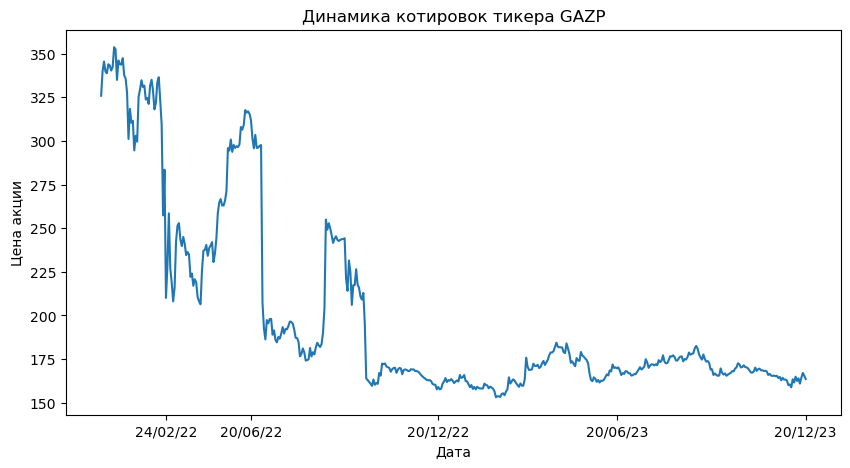

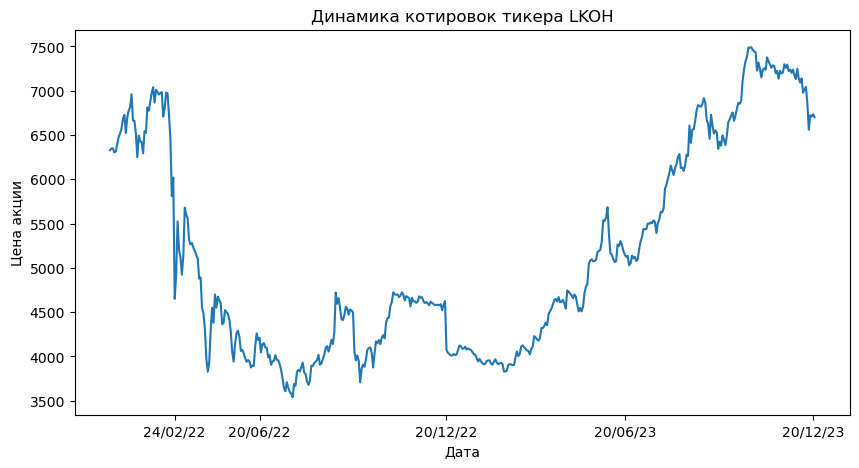

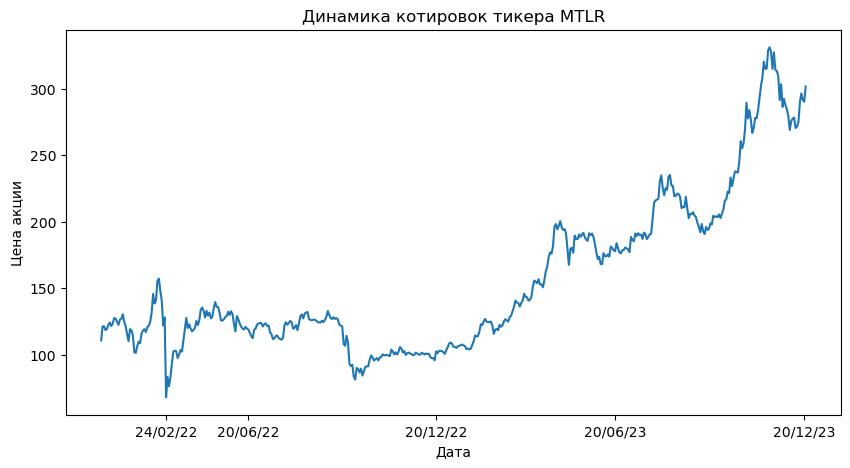

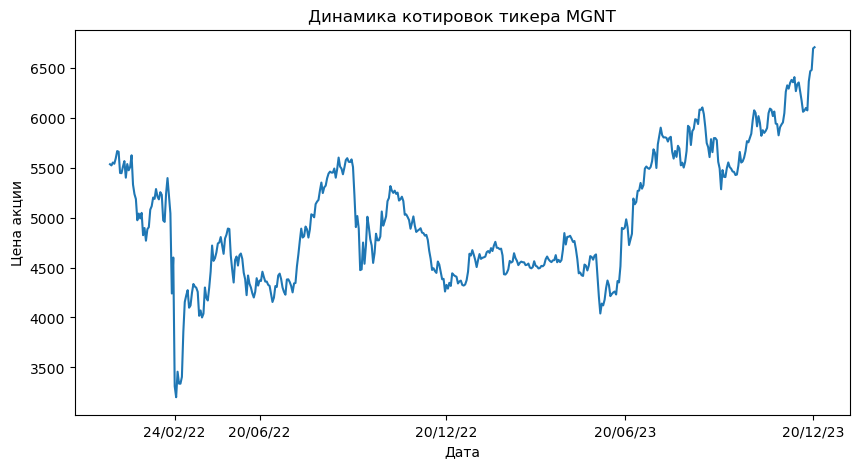

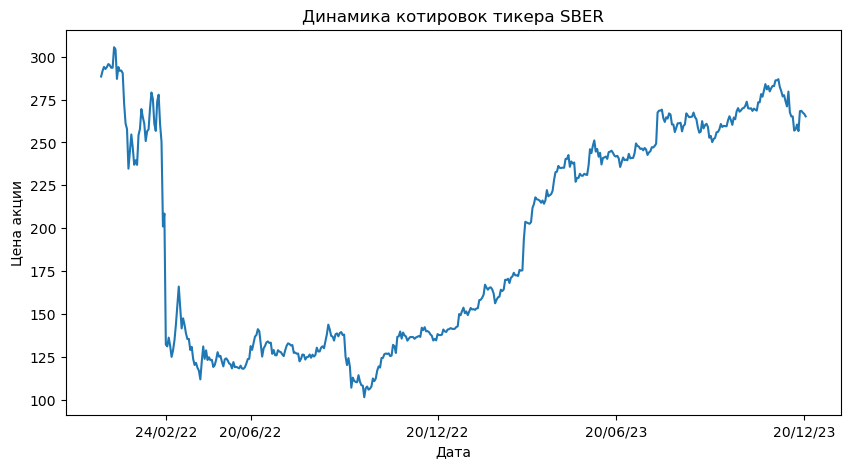

In [7]:
for ticker in tickers:
    df_ticker = df.loc[df.TICKER == ticker]
    
    plt.figure(figsize=(10,5))
    
    plt.plot(df_ticker.DATE, df_ticker.CLOSE)

    plt.xticks(["24/02/22","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Цена акции')
    plt.title(f"Динамика котировок тикера {ticker}")
    plt.show()

Как можно увидеть на графиках, на котировки топ-5 акций по обороту на Московской Бирже наибольшее влияние оказала Специальная военная операция, которая началась 24/02/22. Стоит отметить восходящую тенденцию стоимости акций компаний, относительно всех котировок (за исключением Газпрома) наблюдается положительный тренд. Наибольшей волатильностью обладают ценные бумаги компании "Магнит". 

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%y')
df

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,GAZP,2021-12-20,324.00,326.00,316.11,325.90,70795770
1,GAZP,2021-12-21,326.75,339.88,326.50,339.88,80061070
2,GAZP,2021-12-22,340.01,349.59,339.29,345.55,96809420
3,GAZP,2021-12-23,346.10,348.32,337.00,339.81,72129000
4,GAZP,2021-12-24,339.30,340.98,334.55,338.79,39005950
...,...,...,...,...,...,...,...
486,SBER,2023-12-15,256.61,268.91,256.61,268.21,84643800
487,SBER,2023-12-18,268.90,270.44,266.54,268.40,51515190
488,SBER,2023-12-19,268.35,269.71,265.00,267.35,38229660
489,SBER,2023-12-20,267.52,269.10,266.20,266.61,30929220


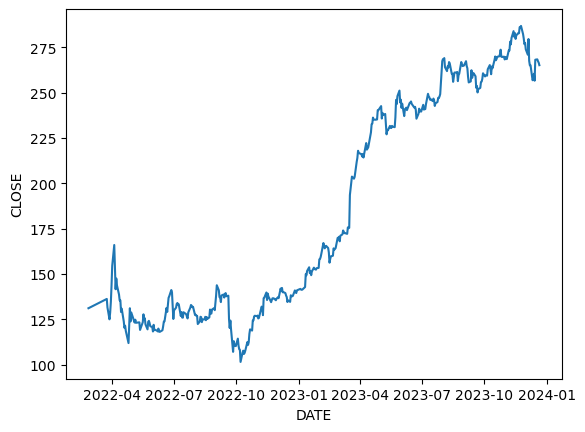

In [9]:
sns.lineplot(df[df['TICKER']=='SBER'][['DATE','CLOSE']].query('DATE>"2022-02-24"'),x='DATE',y='CLOSE')

plt.show()

In [10]:
data = df[df['TICKER']=='SBER'][['DATE','CLOSE']].query('DATE>"2022-02-24"')
data.head()

,DATE,CLOSE
46,2022-02-25,131.12
47,2022-03-24,136.24
48,2022-03-25,131.50
49,2022-03-28,125.00
50,2022-03-29,128.77


In [11]:
x = data[['DATE']]
y = data[['CLOSE']]

<Axes: ylabel='Density'>

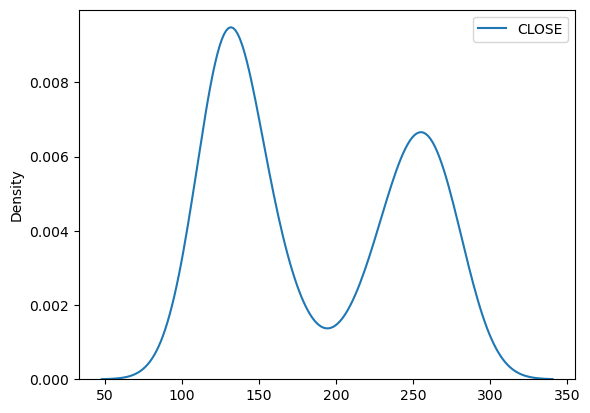

In [12]:
sns.kdeplot(y)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
data.corr(method='spearman')

,DATE,CLOSE
DATE,1.000000,0.922416
CLOSE,0.922416,1.000000


In [15]:
from datetime import datetime

def to_unix(dt):
    return int(datetime.timestamp(dt))


In [16]:
data['unix'] = data['DATE'].apply(to_unix)
x_1 = data[['unix']]

In [17]:
model = LinearRegression()
x_train,x_test,y_train,y_test = train_test_split(x_1,y,test_size=0.33,random_state = 42)
model.fit(x_train,y_train)

LinearRegression()

<Axes: xlabel='unix', ylabel='CLOSE'>

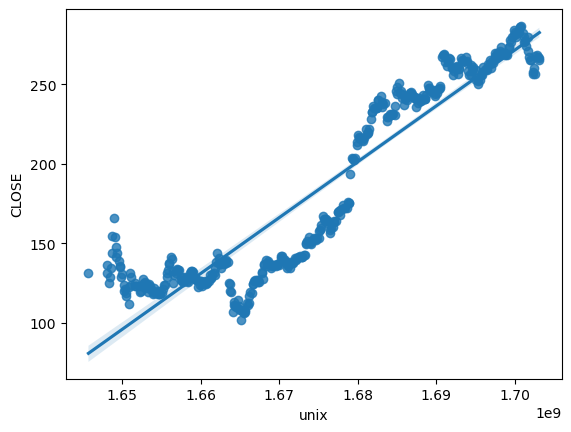

In [18]:
sns.regplot(data,x='unix',y='CLOSE')

In [19]:
model.score(x_train,y_train)

0.8635949709072623

In [20]:
from sklearn.metrics import mean_squared_error,r2_score

In [21]:
r2_score(model.predict(x_train), y_train)

0.8420497644289946

In [22]:
mean_squared_error(model.predict(x_train), y_train)

477.43975483275614

In [23]:
r2_score(model.predict(x_test), y_test)

0.8708786205763916

In [24]:
data['y_pred'] = model.predict(x_1)
data['errors'] = y-model.predict(x_1)

<Axes: xlabel='errors', ylabel='Count'>

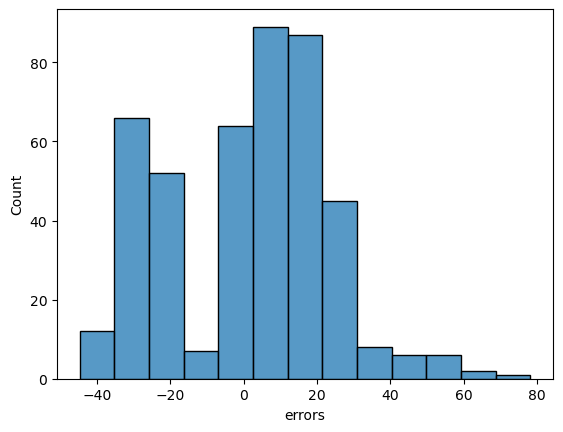

In [25]:
sns.histplot(data['errors'])

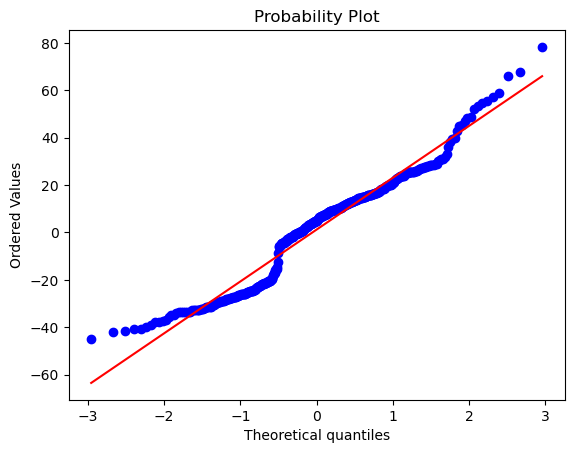

In [26]:
st.probplot(data['errors'],dist='norm',plot=plt)
plt.show()

In [27]:
data['errors'].describe()

count    445.000000
mean       1.209911
std       22.244591
min      -44.816809
25%      -21.405805
50%        5.004875
75%       15.611417
max       78.265382
Name: errors, dtype: float64

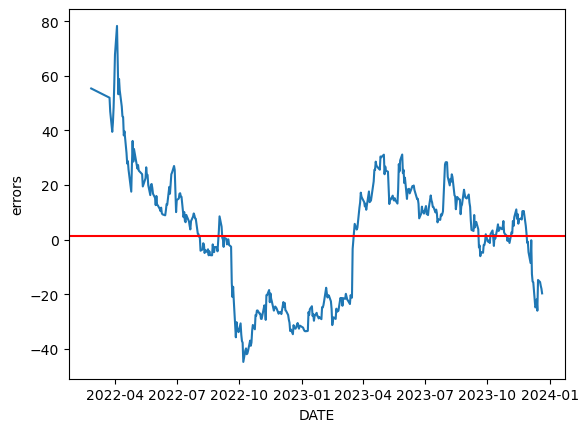

In [28]:
sns.lineplot(data,x='DATE',y='errors')

plt.axhline(y=1.209911, color='r', linestyle='-')

plt.show()

<Axes: xlabel='DATE', ylabel='CLOSE'>

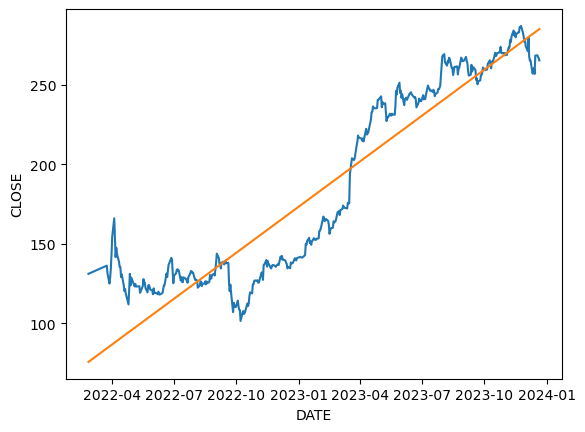

In [29]:
sns.lineplot(data,x='DATE',y='CLOSE')

sns.lineplot(data,x='DATE',y='y_pred')

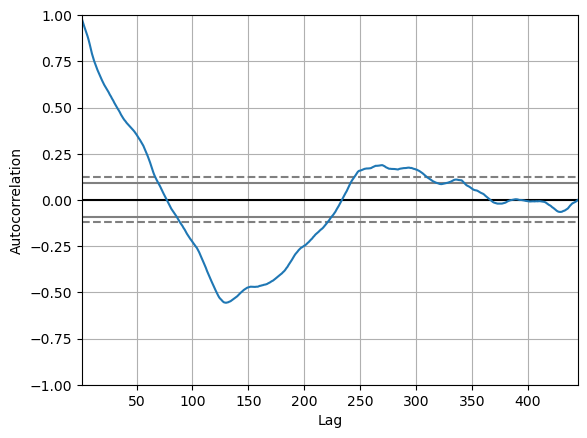

In [30]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data['errors'])
plt.show()

In [31]:
from statsmodels. tsa.stattools import adfuller

adfuller(data['CLOSE'])[1]
#ряд нестационарен

0.9255771828217594

In [32]:
data['log_close'] = np.log(data.CLOSE)
data.head(3)

,DATE,CLOSE,unix,y_pred,errors,log_close
46,2022-02-25,131.12,1645736400,75.766213,55.353787,4.876113
47,2022-03-24,136.24,1648069200,84.270080,51.969920,4.914418
48,2022-03-25,131.50,1648155600,84.585038,46.914962,4.879007


In [33]:
from scipy.stats import boxcox

In [34]:
transformed_data, best_lambda = boxcox(data.CLOSE)
data['box_close'] = transformed_data
data.head(3)

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close
46,2022-02-25,131.12,1645736400,75.766213,55.353787,4.876113,2.425206
47,2022-03-24,136.24,1648069200,84.270080,51.969920,4.914418,2.432831
48,2022-03-25,131.50,1648155600,84.585038,46.914962,4.879007,2.425785


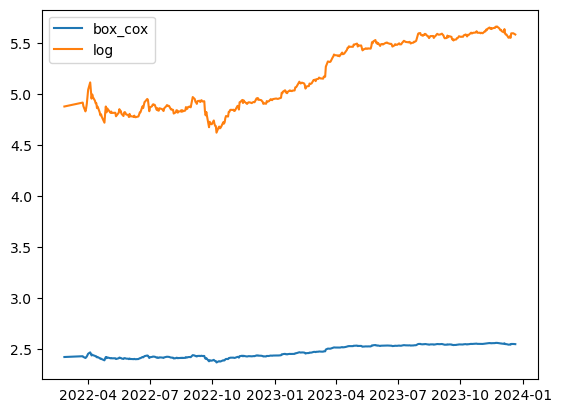

In [35]:
plt.plot(data.DATE,data.box_close,label='box_cox')

plt.plot(data.DATE,data.log_close,label='log')

plt.legend()

plt.show()

<Axes: >

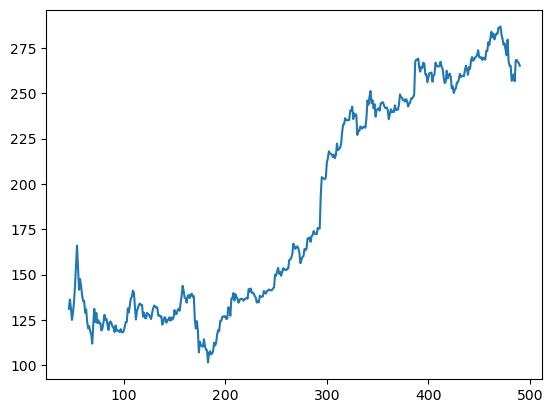

In [36]:
data.CLOSE.plot()

<Axes: >

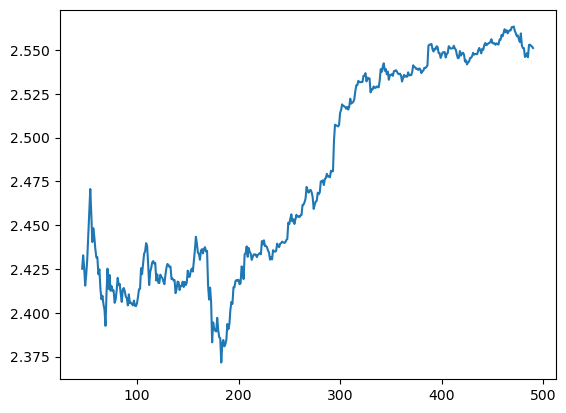

In [37]:
data.box_close.plot()

In [38]:
adfuller(data.box_close)[1]

0.8944073246572262

In [39]:
data.head(4)

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close
46,2022-02-25,131.12,1645736400,75.766213,55.353787,4.876113,2.425206
47,2022-03-24,136.24,1648069200,84.270080,51.969920,4.914418,2.432831
48,2022-03-25,131.50,1648155600,84.585038,46.914962,4.879007,2.425785
49,2022-03-28,125.00,1648414800,85.529912,39.470088,4.828314,2.415555


In [40]:
data.reset_index(inplace=True)

In [41]:
data.drop('index',axis=1,inplace=True)

In [42]:
data.CLOSE[1]-data.CLOSE[0]

5.1200000000000045

In [43]:
a=[]
for i in range(1,data.shape[0]):
    a.append(data.CLOSE[i]-data.CLOSE[i-1])

In [44]:
a.insert(0,0)

In [45]:
a = pd.DataFrame({'delta':a})

In [46]:
data['delta'] = a
data.head()

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close,delta
0,2022-02-25,131.12,1645736400,75.766213,55.353787,4.876113,2.425206,0.00
1,2022-03-24,136.24,1648069200,84.270080,51.969920,4.914418,2.432831,5.12
2,2022-03-25,131.50,1648155600,84.585038,46.914962,4.879007,2.425785,-4.74
3,2022-03-28,125.00,1648414800,85.529912,39.470088,4.828314,2.415555,-6.50
4,2022-03-29,128.77,1648501200,85.844870,42.925130,4.858028,2.421572,3.77


<Axes: xlabel='DATE', ylabel='delta'>

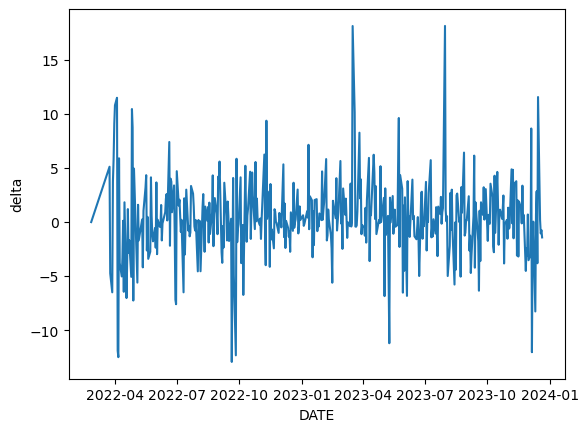

In [47]:
sns.lineplot(data,x=data.DATE,y=data.delta)

In [48]:
adfuller(data.delta)[1]

0.0

In [49]:
import statsmodels.api as sm

In [50]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.delta)[1])

Критерий Дики-Фуллера: p=0.000000


P значение меньше 0.05, следовательно, мы отклоняем нулевую гипотезу и делаем вывод, что временной ряд стационарен

In [51]:
import statsmodels.api as sm

#perform KPSS test
sm. tsa.stattools.kpss (data.delta, regression='ct')

(0.12306335565609433,
 0.09247526730352901,
 2,
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})

P значение болье 0.05, следовательно, мы принимаем нулевую гипотезу и делаем вывод, что временной ряд стационарен

In [52]:
import pymannkendall as mk

In [53]:
mk. original_test (data.delta)

Mann_Kendall_Test(trend='no trend', h=False, p=0.6304293088492559, z=0.48112268125244223, Tau=0.015274825387184937, s=1509.0, var_s=9824060.333333334, slope=0.0005263157894739119, intercept=0.07315789473678928)

В этом примере p-значение равно p=0.6304293088492559 , что не меньше 0,05. Таким образом, в данных временного ряда нет существенной тенденции.

После дифференцирования ряда, то есть нахождения его асболютных приростов (первых разностей), без стабилизации дисперсии мы получили стационарный ряд. По теореме Вольда любой стационарный ряд может быть описан процессом ARMA (arima в данном случае). Найдём оптимальные параметры модели. 

In [54]:
from statsmodels.tsa.arima.model import ARIMA

In [55]:
model = ARIMA(data.delta, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  delta   No. Observations:                  445
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1208.425
Date:                Wed, 03 Apr 2024   AIC                           2422.849
Time:                        23:28:11   BIC                           2435.137
Sample:                             0   HQIC                          2427.695
                                - 445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0171      0.032     -0.537      0.591      -0.080       0.045
ma.L1         -0.9988      0.026    -37.800      0.000      -1.051      -0.947
sigma2        13.3660      0.564     23.697      0.0

In [56]:
forecast = model_fit.forecast(steps=12)
forecast

445    0.331256
446    0.301304
447    0.301816
448    0.301807
449    0.301807
450    0.301807
451    0.301807
452    0.301807
453    0.301807
454    0.301807
455    0.301807
456    0.301807
Name: predicted_mean, dtype: float64

In [57]:
mse = mean_squared_error(data.delta[-12:], forecast)
mse

32.553841140885005

In [58]:
import pmdarima as pmd

In [59]:
model_arima = pmd.arima.auto_arima(data.delta,information_criterion='aic', alpha=0.05, test='kpss',d=1)
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  445
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1238.872
Date:                Wed, 03 Apr 2024   AIC                           2489.743
Time:                        23:28:15   BIC                           2514.318
Sample:                             0   HQIC                          2499.434
                                - 445                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8429      0.030    -27.855      0.000      -0.902      -0.784
ar.L2         -0.6707      0.047    -14.381      0.000      -0.762      -0.579
ar.L3         -0.4761      0.050     -9.505      0.0

In [78]:
arima_pred = model_arima.predict(n_periods=10)
arima_pred

445    0.260475
446    2.043584
447   -0.105661
448   -0.115374
449    0.035556
450   -0.056571
451    0.302970
452    0.456219
453    0.078311
454    0.123095
dtype: float64

In [79]:
mse_arima = mean_squared_error(data.delta[-10:], arima_pred)
mse_arima

27.117505931427992

In [80]:
data.head()

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close,delta
0,2022-02-25,131.12,1645736400,75.766213,55.353787,4.876113,2.425206,0.00
1,2022-03-24,136.24,1648069200,84.270080,51.969920,4.914418,2.432831,5.12
2,2022-03-25,131.50,1648155600,84.585038,46.914962,4.879007,2.425785,-4.74
3,2022-03-28,125.00,1648414800,85.529912,39.470088,4.828314,2.415555,-6.50
4,2022-03-29,128.77,1648501200,85.844870,42.925130,4.858028,2.421572,3.77


In [81]:
b = pd.DataFrame({'DATE':np.zeros(10),'CLOSE':np.zeros(10),
                  'unix':np.zeros(10),
                  'y_pred':np.zeros(10),
                  'errors':np.zeros(10),
                  'log_close':np.zeros(10),
                  'box_close':np.zeros(10),
                  'delta':arima_pred})
b.reset_index(inplace=True)
b.drop('index',axis=1,inplace=True)
b

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close,delta
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.260475
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.043584
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.105661
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.115374
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.035556
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.056571
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.302970
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.456219
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078311
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123095


In [82]:
for i in range(10):
    data.loc[len(df)+i] = b.iloc[i]
    
data.reset_index(inplace=True)
data

,index,DATE,CLOSE,unix,y_pred,errors,log_close,box_close,delta
0,0,2022-02-25 00:00:00,131.12,1.645736e+09,75.766213,55.353787,4.876113,2.425206,0.000000
1,1,2022-03-24 00:00:00,136.24,1.648069e+09,84.270080,51.969920,4.914418,2.432831,5.120000
2,2,2022-03-25 00:00:00,131.50,1.648156e+09,84.585038,46.914962,4.879007,2.425785,-4.740000
3,3,2022-03-28 00:00:00,125.00,1.648415e+09,85.529912,39.470088,4.828314,2.415555,-6.500000
4,4,2022-03-29 00:00:00,128.77,1.648501e+09,85.844870,42.925130,4.858028,2.421572,3.770000
...,...,...,...,...,...,...,...,...,...
450,2457,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.056571
451,2458,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.302970
452,2459,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.456219
453,2460,0.0,0.00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.078311


In [83]:
data.drop('index',axis=1,inplace=True)

In [84]:
for i in range(444,data.shape[0]):
    data.CLOSE.iloc[i] = data.CLOSE.iloc[i-1] + data.delta.iloc[i]

In [85]:
data.tail()

,DATE,CLOSE,unix,y_pred,errors,log_close,box_close,delta
450,0.0,267.252008,0.0,0.0,0.0,0.0,0.0,-0.056571
451,0.0,267.554978,0.0,0.0,0.0,0.0,0.0,0.302970
452,0.0,268.011196,0.0,0.0,0.0,0.0,0.0,0.456219
453,0.0,268.089507,0.0,0.0,0.0,0.0,0.0,0.078311
454,0.0,268.212602,0.0,0.0,0.0,0.0,0.0,0.123095


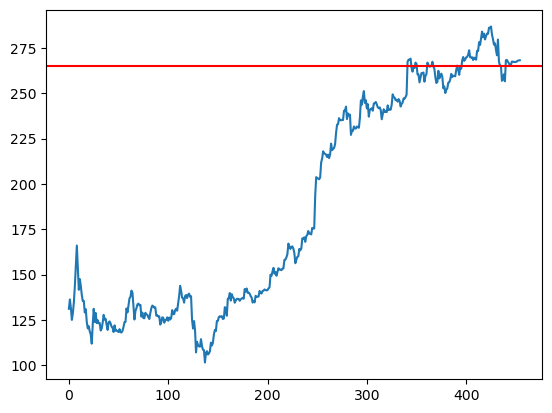

In [86]:
data.CLOSE.plot()

plt.axhline(y=data.CLOSE.iloc[444],color='r')


plt.show()

<Axes: >

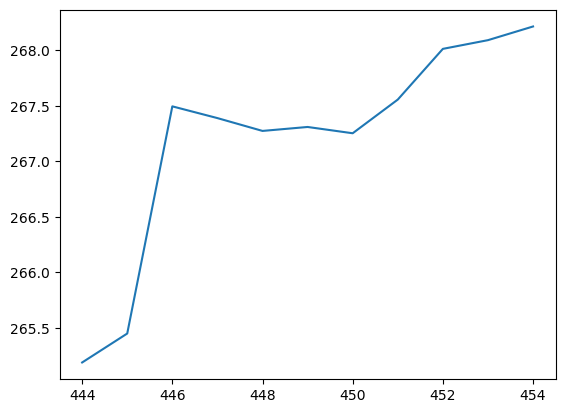

In [87]:
data.CLOSE.iloc[444:].plot()

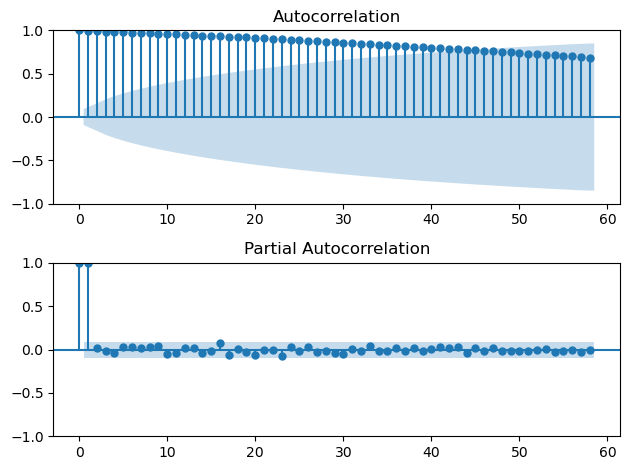

In [88]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.CLOSE.values.squeeze(), lags=58, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.CLOSE.values.squeeze(), lags=58, ax=ax);

plt.tight_layout()

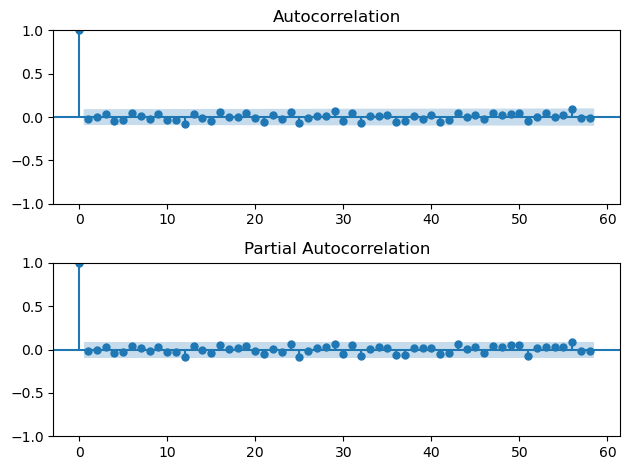

In [89]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.delta.values.squeeze(), lags=58, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.delta.values.squeeze(), lags=58, ax=ax);

plt.tight_layout()

In [90]:
sber = pd.read_csv('SBER_220225_240402.csv',sep=';',parse_dates=[2], date_format='%d%m%y')

In [91]:
sber.columns = sber.columns.str.strip('<>')
sber.drop(['PER','TIME'],axis=1,inplace=True)

In [92]:
sber.head()

,TICKER,DATE,OPEN,HIGH,LOW,CLOSE,VOL
0,SBER,2022-02-26,123.75,152.89,115.11,131.12,396287150
1,SBER,2022-03-25,131.00,156.20,130.15,136.24,153705270
2,SBER,2022-03-26,137.10,147.00,128.20,131.50,57307510
3,SBER,2022-03-29,130.60,131.47,125.00,125.00,32756540
4,SBER,2022-03-30,126.19,137.57,122.00,128.77,72242360


In [93]:
sber.shape[0]

514

In [94]:
sber.drop(['TICKER','OPEN','HIGH','LOW','VOL'],axis=1,inplace=True)

In [95]:
def to_unix(dt):
    return int(datetime.timestamp(dt))

sber['unix'] = sber['DATE'].apply(to_unix)
x = sber[['unix']]
y=sber[['CLOSE']]

In [96]:
sber.head(3)

,DATE,CLOSE,unix
0,2022-02-26,131.12,1645822800
1,2022-03-25,136.24,1648155600
2,2022-03-26,131.50,1648242000


In [97]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1167,random_state=42)
train_x

,unix
249,1679346000
194,1672261200
172,1669669200
82,1658523600
452,1704402000
...,...
106,1661461200
270,1681851600
348,1691614800
435,1702069200


In [98]:
linreg = LinearRegression()
linreg.fit(train_x,train_y)

LinearRegression()

In [99]:
r2_score(linreg.predict(train_x),train_y)

0.8894107002616204

In [100]:
r2_score(linreg.predict(test_x),test_y)

0.8631069745999793

In [101]:
sber['y_lpred'] = linreg.predict(x)
sber['err'] = y-linreg.predict(x)
sber.head(3)

,DATE,CLOSE,unix,y_lpred,err
0,2022-02-26,131.12,1645822800,83.792206,47.327794
1,2022-03-25,136.24,1648155600,91.671697,44.568303
2,2022-03-26,131.50,1648242000,91.963530,39.536470


<Axes: >

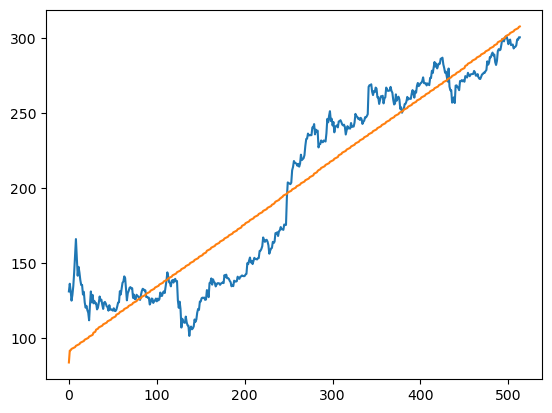

In [102]:
sber.CLOSE.plot()

sber.y_lpred.plot()

<Axes: >

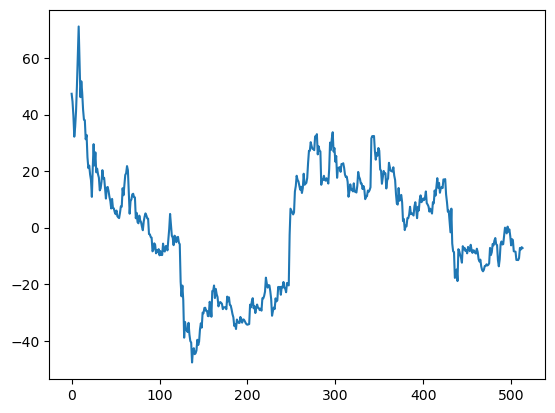

In [103]:
sber.err.plot()

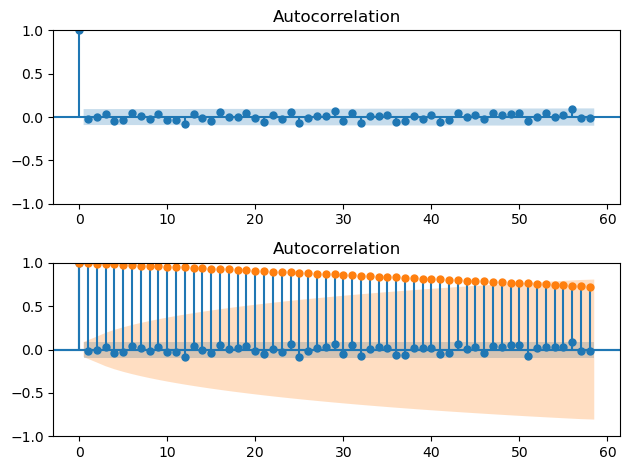

In [104]:
sm.graphics.tsa.plot_acf(sber.CLOSE.values.squeeze(), lags=58, ax=ax)

In [105]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(sber.CLOSE)[1])

Критерий Дики-Фуллера: p=0.959354


In [106]:
sber

,DATE,CLOSE,unix,y_lpred,err
0,2022-02-26,131.12,1645822800,83.792206,47.327794
1,2022-03-25,136.24,1648155600,91.671697,44.568303
2,2022-03-26,131.50,1648242000,91.963530,39.536470
3,2022-03-29,125.00,1648501200,92.839029,32.160971
4,2022-03-30,128.77,1648587600,93.130862,35.639138
...,...,...,...,...,...
509,2024-03-28,295.10,1711573200,305.877141,-10.777141
510,2024-03-29,299.00,1711659600,306.168974,-7.168974
511,2024-03-30,298.72,1711746000,306.460807,-7.740807
512,2024-04-02,300.43,1712005200,307.336306,-6.906306


In [107]:
b=[]
for i in range(1,sber.shape[0]):
    b.append(sber.CLOSE[i]-sber.CLOSE[i-1])
    
b.insert(0,0)
b = pd.DataFrame({'delta':b})
sber['d'] = b
sber.head()

,DATE,CLOSE,unix,y_lpred,err,d
0,2022-02-26,131.12,1645822800,83.792206,47.327794,0.00
1,2022-03-25,136.24,1648155600,91.671697,44.568303,5.12
2,2022-03-26,131.50,1648242000,91.963530,39.536470,-4.74
3,2022-03-29,125.00,1648501200,92.839029,32.160971,-6.50
4,2022-03-30,128.77,1648587600,93.130862,35.639138,3.77


In [108]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(sber.d)[1])

Критерий Дики-Фуллера: p=0.000000


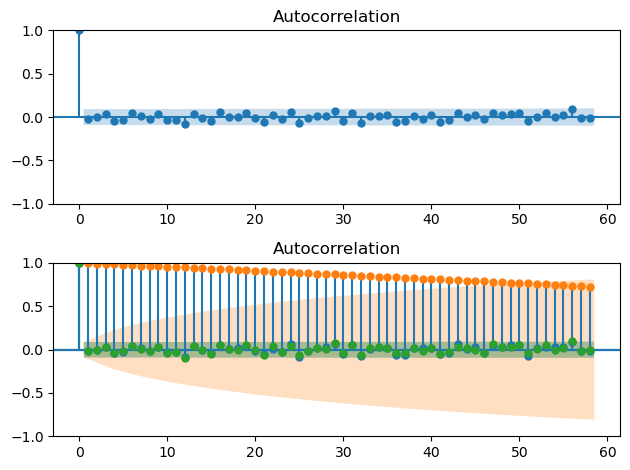

In [109]:
sm.graphics.tsa.plot_acf(sber.d.values.squeeze(), lags=58, ax=ax)

In [110]:
data.CLOSE.tail()

450    267.252008
451    267.554978
452    268.011196
453    268.089507
454    268.212602
Name: CLOSE, dtype: float64

In [111]:
sber.tail()

,DATE,CLOSE,unix,y_lpred,err,d
509,2024-03-28,295.10,1711573200,305.877141,-10.777141,0.99
510,2024-03-29,299.00,1711659600,306.168974,-7.168974,3.90
511,2024-03-30,298.72,1711746000,306.460807,-7.740807,-0.28
512,2024-04-02,300.43,1712005200,307.336306,-6.906306,1.71
513,2024-04-03,300.41,1712091600,307.628139,-7.218139,-0.02


In [112]:
model_arima = pmd.arima.auto_arima(sber.d.iloc[:455],information_criterion='aic', alpha=0.05, test='kpss',d=1)
print(model_arima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  455
Model:               SARIMAX(5, 1, 0)   Log Likelihood               -1263.825
Date:                Wed, 03 Apr 2024   AIC                           2539.650
Time:                        23:32:32   BIC                           2564.359
Sample:                             0   HQIC                          2549.385
                                - 455                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8485      0.030    -28.529      0.000      -0.907      -0.790
ar.L2         -0.6762      0.046    -14.739      0.000      -0.766      -0.586
ar.L3         -0.4821      0.049     -9.826      0.0

In [113]:
c =sber.d.iloc[:455].to_list()
с = c.extend(model_arima.predict(n_periods=59).to_list())
c = np.array(c)
len(c)

514

In [114]:
sber['d_new'] = pd.DataFrame(c)
sber.tail(3)

,DATE,CLOSE,unix,y_lpred,err,d,d_new
511,2024-03-30,298.72,1711746000,306.460807,-7.740807,-0.28,1.127357
512,2024-04-02,300.43,1712005200,307.336306,-6.906306,1.71,1.127357
513,2024-04-03,300.41,1712091600,307.628139,-7.218139,-0.02,1.127357


In [115]:
hhh=[]
for i in range(444,sber.shape[0]):
    hhh.append(sber.CLOSE.iloc[i-1] + sber.d_new.iloc[i])    

In [116]:
close=sber.CLOSE.iloc[:455].to_list()

In [117]:
for element in hhh:
    close.append(element)

In [118]:
sber['close_new'] = pd.DataFrame(close)
sber.tail(3)

,DATE,CLOSE,unix,y_lpred,err,d,d_new,close_new
511,2024-03-30,298.72,1711746000,306.460807,-7.740807,-0.28,1.127357,299.977357
512,2024-04-02,300.43,1712005200,307.336306,-6.906306,1.71,1.127357,296.957358
513,2024-04-03,300.41,1712091600,307.628139,-7.218139,-0.02,1.127357,299.427357


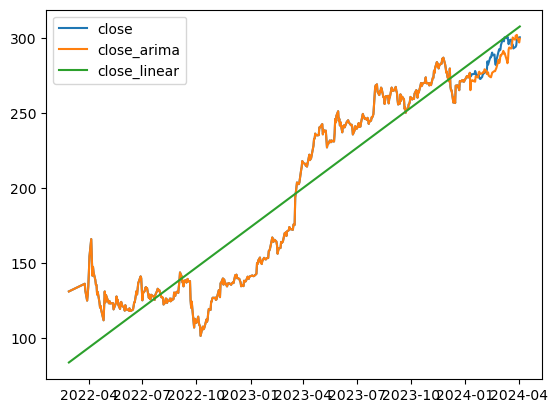

In [119]:
plt.plot(sber.DATE,sber.CLOSE,label='close')

plt.plot(sber.DATE,sber.close_new,label='close_arima')

plt.plot(sber.DATE,sber.y_lpred,label='close_linear')

plt.legend()

plt.show()

In [120]:
r2_score(sber.CLOSE.iloc[455:],sber.close_new.iloc[455:])

0.4454308345916116

In [121]:
r2_score(sber.CLOSE.iloc[455:],sber.y_lpred.iloc[455:])

0.1098632135730554

In [122]:
sber['err_arima'] = sber.CLOSE-sber.close_new

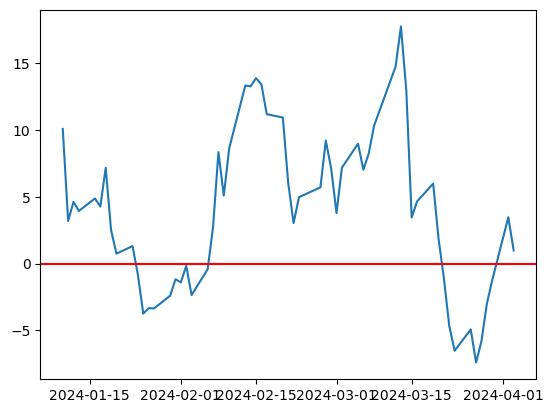

In [123]:
plt.plot(sber.DATE.iloc[455:],sber.err_arima.iloc[455:])

plt.axhline(y=0,color='r')

plt.show()

In [124]:
adfuller(sber.err_arima.iloc[455:])[1]

0.08211310493156793

In [126]:
# autocorrelation_plot(sber.err_arima.iloc[455:])
plt.show()

# Модель экспоненциального сглаживания. 

# 5.Для каждой акции найдите дни максимального изменения цены (взлета и падения). Составьте отчет.

In [8]:
df['DELTA'] = df['CLOSE'] - df['OPEN']

In [9]:
report_change = df.pivot_table(
    index='TICKER',
    values='DELTA',
    aggfunc=['min', 'max']
)
report_change.columns=['min','max']
report_change

,min,max
TICKER,,
GAZP,-92.6,29.56
LKOH,-750.0,568.00
MGNT,-801.0,420.00
MTLR,-40.0,19.46
SBER,-54.4,19.30


In [10]:
mini = np.array(report_change['min'])
maxi = np.array(report_change['max'])
report = pd.DataFrame({'Ticker':tickers,'Min':mini,'Max':maxi})

In [11]:
data_min=[]
data_max=[]
for i in range(report.shape[0]):
    data_min.append(df.loc[df['DELTA']==report['Min'][i]]['DATE'].iloc[0])
    
for i in range(report.shape[0]):
    data_max.append(df.loc[df['DELTA']==report['Max'][i]]['DATE'].iloc[0])    
    
report_data = pd.DataFrame({'Ticker':tickers,'Min_date':data_min,'Max_date':data_max})
report_data

,Ticker,Min_date,Max_date
0,GAZP,30/06/22,22/02/22
1,LKOH,24/02/22,31/03/22
2,MTLR,21/02/22,22/02/22
3,MGNT,11/05/22,25/10/23
4,SBER,24/02/22,27/01/22


Отметим тот факт, что все дни максимального изменения цены произошли в 2022 году. Неудивительно, ведь именно в данный период Россия претерпевала значительные политические, а вместе с ними, и экономические изменения. Большая часть падений произошла в феврале 2022 года по понятным причинам. При этом большая часть взлёта также произошла в феврале 2022 года. Таким образом, можно предположить, что либо изменения на территории РФ имели неоднозначный характер, либо же компаниям в какой-то мере удалось провести стабилизирующую политику. 

# 6. Найдите скользящие средние (периоды 10, 50, 100) для каждой акции. Добавьте на график.

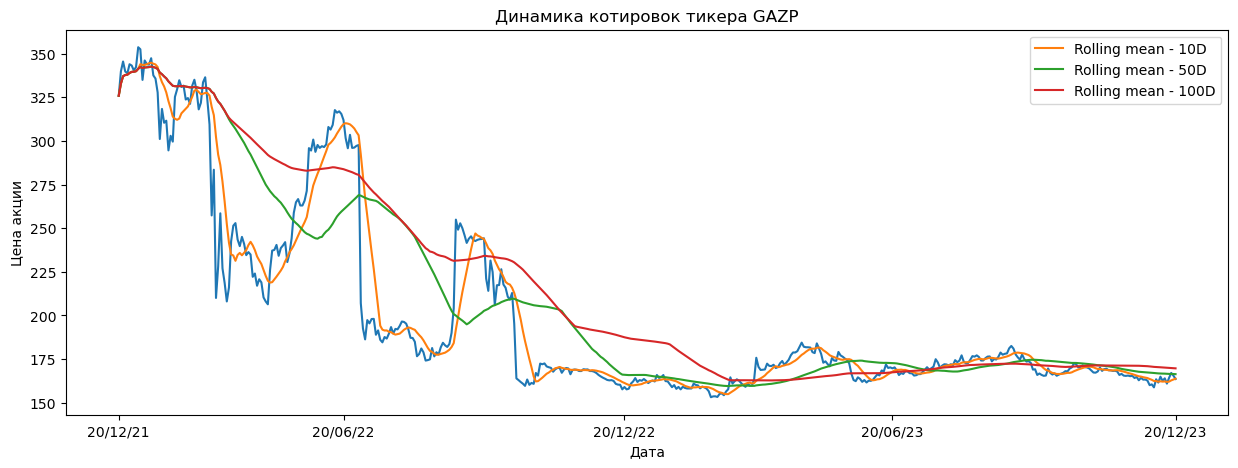

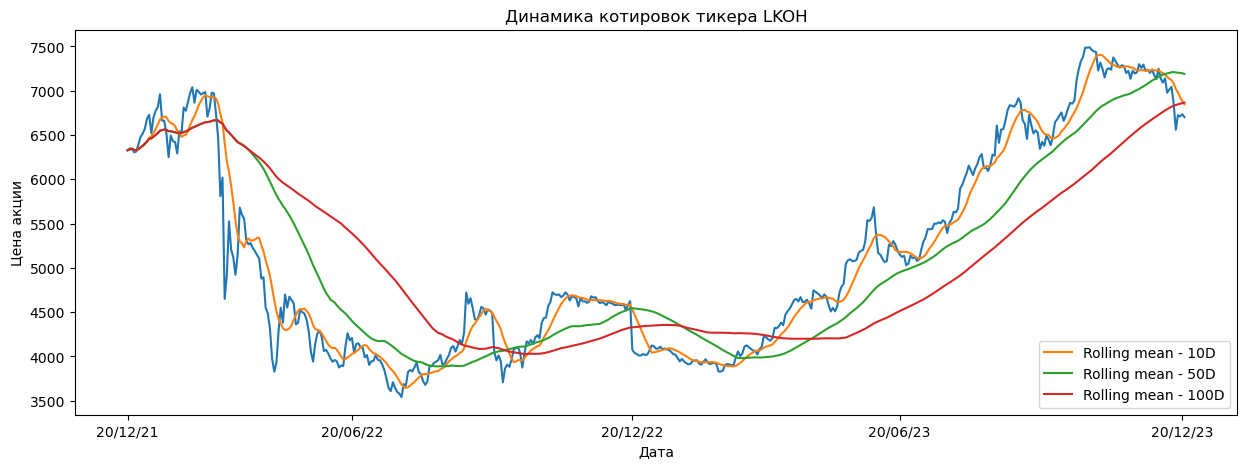

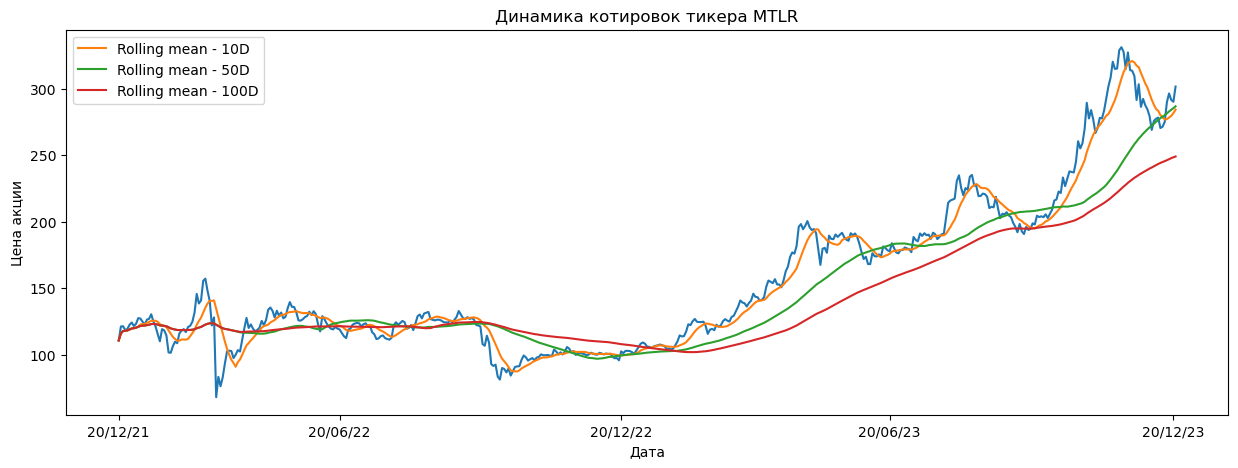

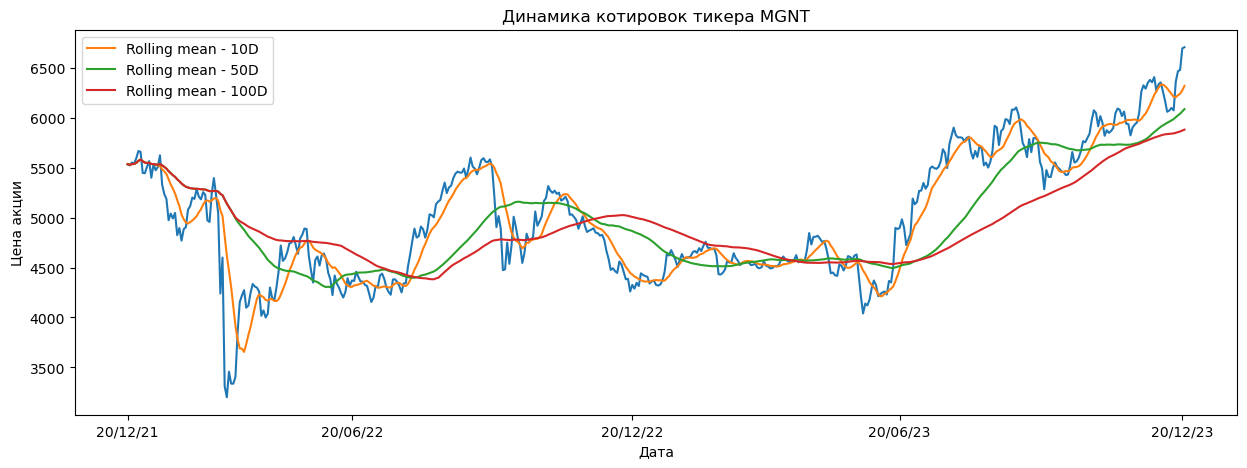

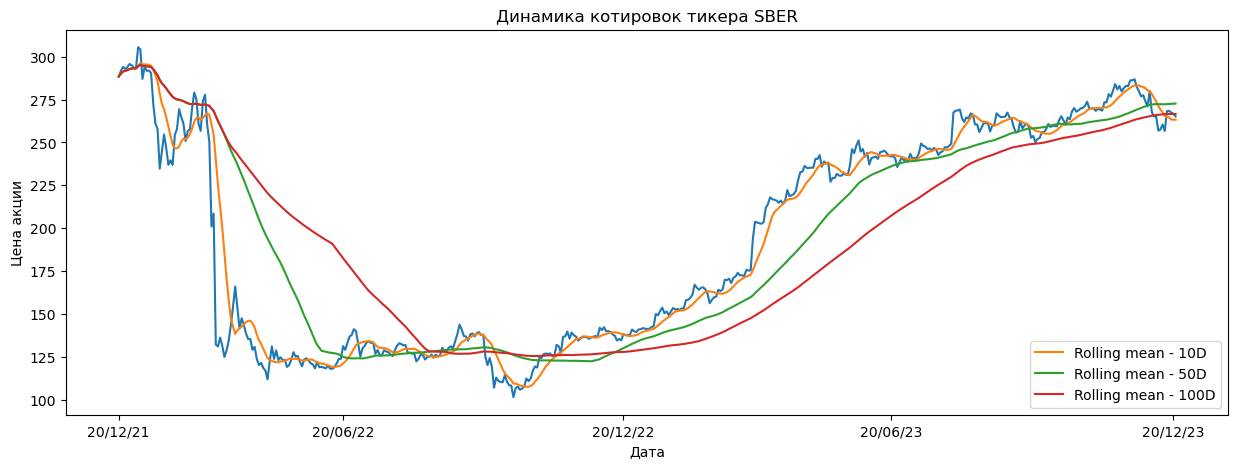

In [12]:
for ticker in tickers:
    df_ticker = df.loc[df.TICKER == ticker]
    
    plt.figure(figsize=(15,5))
    
    plt.plot(df_ticker.DATE, df_ticker.CLOSE)
    windows = [10, 50, 100]
    for window in windows:
        plt.plot(df_ticker.DATE, df_ticker.CLOSE.rolling(window, min_periods=1).mean(), label=f'Rolling mean - {window}D')
    
    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Цена акции')
    plt.title(f"Динамика котировок тикера {ticker}")
    plt.legend()
    plt.show()

Скользящие средние являются одним из основных инструментов прогнозирования и часто используются для анализа рынка. Скользящие средние могут выступить как уровень сопротивления, поскольку часто, если цена актива находится ниже линии индикатора, закрепиться выше бывает достаточно сложно.Пересечение скользящей средней с ценой может стать сигналом для совершения сделки: пересечение цены снизу вверх дает сигнал на покупку, сверху вниз — на продажу.


Газпром: мы видим, что в мае 2022 года возможно был ложный сигнал на покупку акций, когда цена пересекла скользящие средние, при этом стоимость все равно пошла вниз. Также хотелось бы отметить периоды консолидации акций с мая 2023 года, где скользящая средняя уже менее информативна

У Лукойла скользящая средняя описывает все довольно четко. Теперь поговорим о крестах, чтобы разнообразить описание. В трейдинге есть такое понятие как золотой крест — более короткая скользящая средняя пересекает более длинную снизу вверх. В теории за этим должен следовать рост анализируемого актива. Мертвый крест — более короткая скользящая средняя пересекает более длинную сверху вниз. В теории за этим должно следовать падение актива. Посмотрим на конкретном примере лукойла. Так мы видим мертвый крест в феврале-марте 2022 года, а золотой крест у нас наблюдается в марте-апреле 2023 года. Еще стоит отметить наличие небольших ложных сигналов, когда цена была выше средней и быстрой скользящей средней, но при этом стоимость акций все равно пошла вниз, это наблюдалось в августе-сентябре 2022 года.

У Мечела всё обстоит довольно естественно. Естественная продажа акций после пробития всех скользящих средних 24/02/22. При этом после 2023 года тренд закрытий стал превосходить 50 и 100 скользящую среднюю и начал опписывать 10-ую среднюю. 

У Магнита дела обстоят слишком неоднозначно. Очень большое количество золотых и мёртвых крестов. Акции компании являются в сравнении с другими уж слишком волатильными. 

Касаемо Сбера, то тут по трендам у нас тоже самое, то есть все описано четко, мертвый крест наблюдался в январе 2022 года(стоимость пошла вниз), а золотой крест мы видим в декабре-январе 2023 года

# 7.Постройте в цикле графики объема (volume) для каждого тикера.

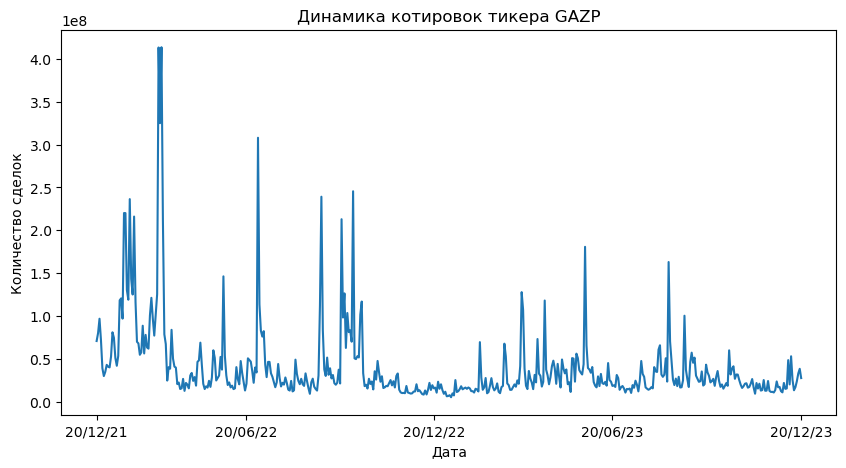

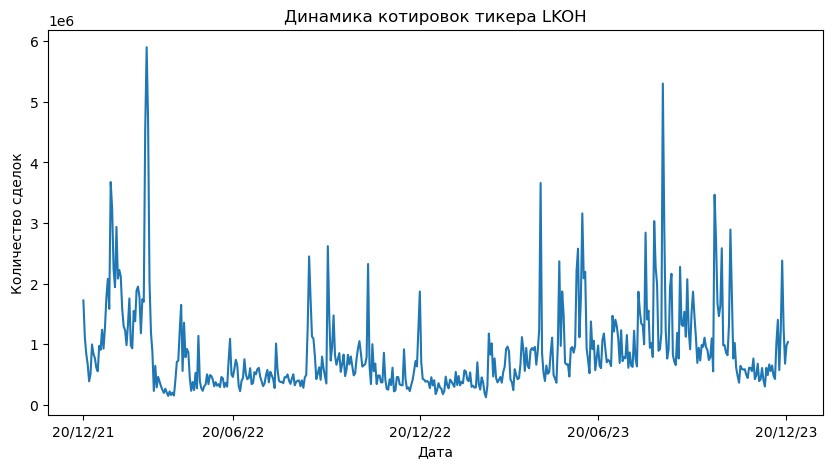

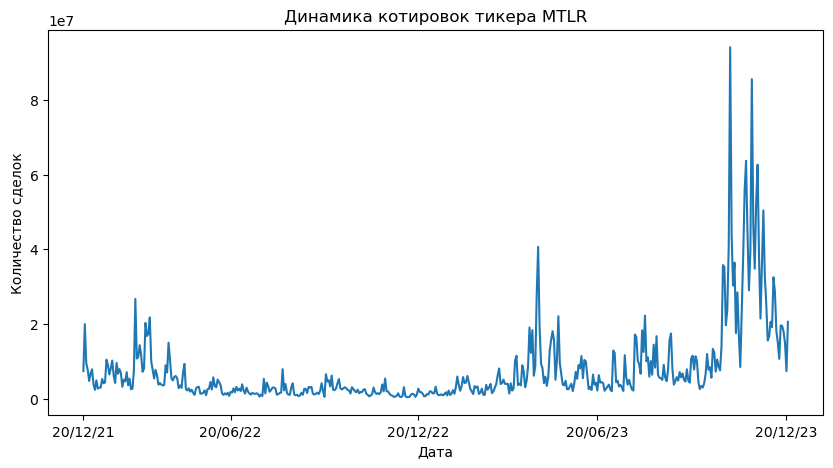

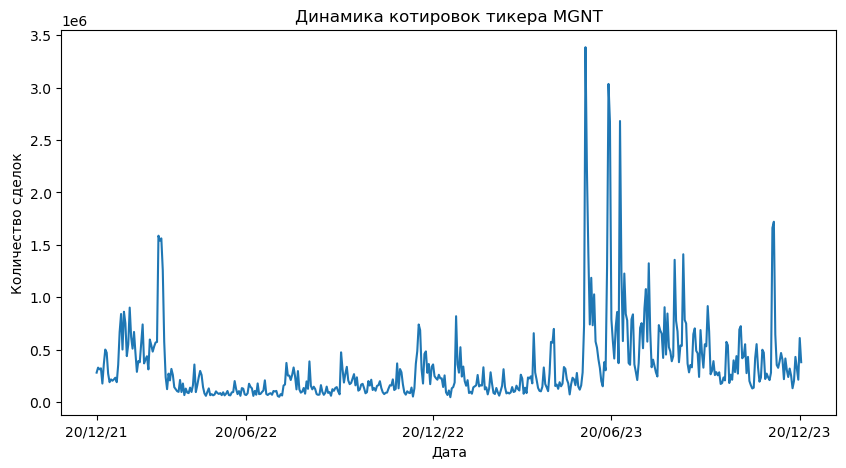

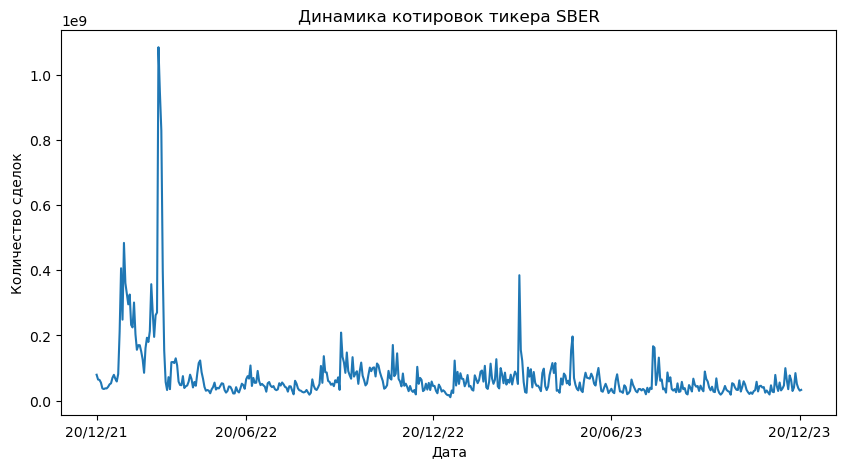

In [13]:
for ticker in tickers:
    df_ticker = df.loc[df.TICKER == ticker]
    
    plt.figure(figsize=(10,5))
    
    plt.plot(df_ticker.DATE, df_ticker.VOL)

    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Количество сделок')
    plt.title(f"Динамика котировок тикера {ticker}")
    plt.show()

Относительно объёма торгов можно однозначно выделить день начала проведения СВО, так как никто из акционеров не хотел потерять свои денежные средства. В остальном наблюдается субъективная волатильность, определённой сезонности или цикличности нет. 

# 8.Реализуйте в цикле для каждого тикера последовательно: график цены вместе с скользящими средними с периодом 50, 100 и график объема, реализуйте с помощью функции. На вход функция принимает два параметра: тикер и год.

In [14]:
def ticker_dynamic(ticker: str, year: int = None) -> None:
    if year:
        _ticker = df.loc[(df.TICKER == ticker) & (df.DATE.dt.year == year)]
    else:
        df_ticker = df.loc[df.TICKER == ticker]
    
    plt.figure(figsize=(10,5))
    plt.plot(df_ticker.DATE, df_ticker.CLOSE)
    
    windows = [50, 100]
    for window in windows:
        plt.plot(df_ticker.DATE, df_ticker.CLOSE.rolling(window, min_periods=1).mean(), label=f'Rolling mean - {window}D')
    
    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Цена акции')
    if year:
        plt.title(f"Динамика котировок тикера {ticker} в {year} году")
    else:
        plt.title(f"Динамика котировок тикера {ticker}")
    plt.legend()
    plt.show()
    
    #График динамики объема торгов тикера
    plt.figure(figsize=(10,2))
    plt.plot(df_ticker.DATE, df_ticker.VOL)
    
    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Количество сделок')
    if year:
        plt.title(f"Динамика объема торгов тикера {ticker} в {year} году")
    else:
        plt.title(f"Динамика объема торгов тикера {ticker}")
    plt.show()

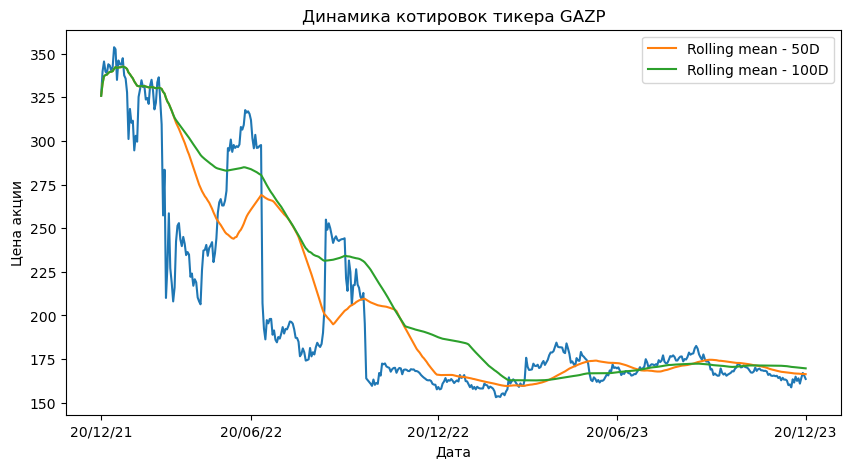

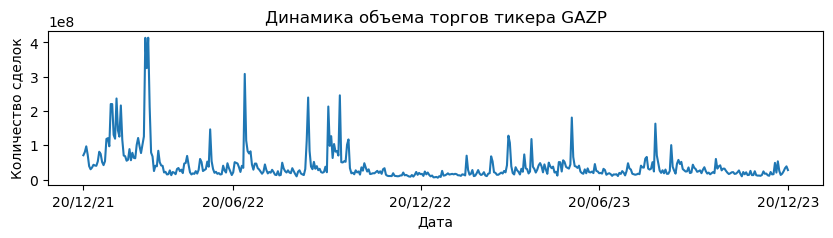

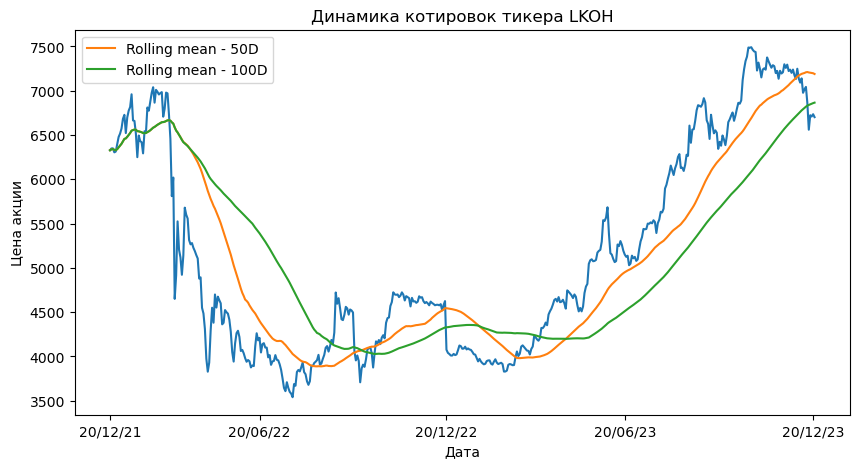

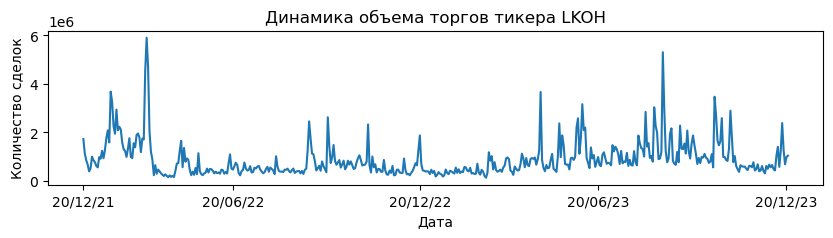

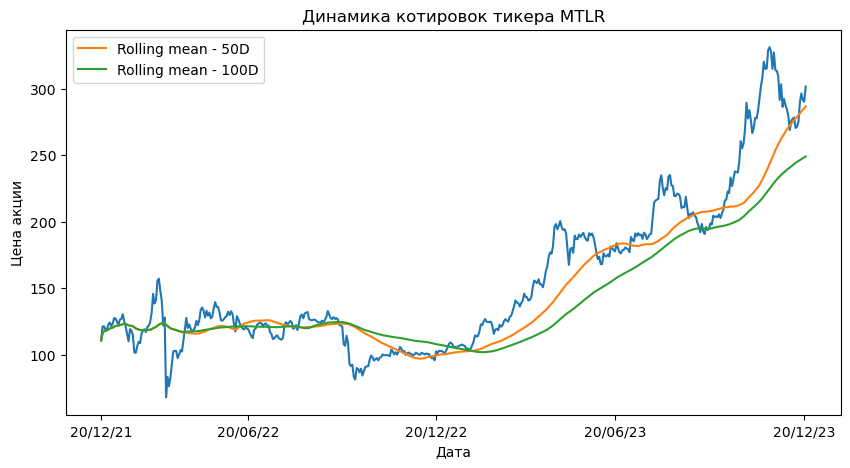

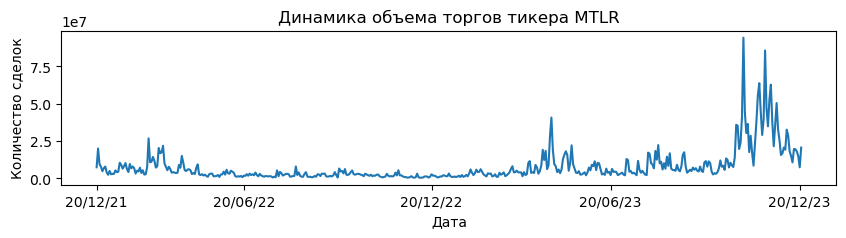

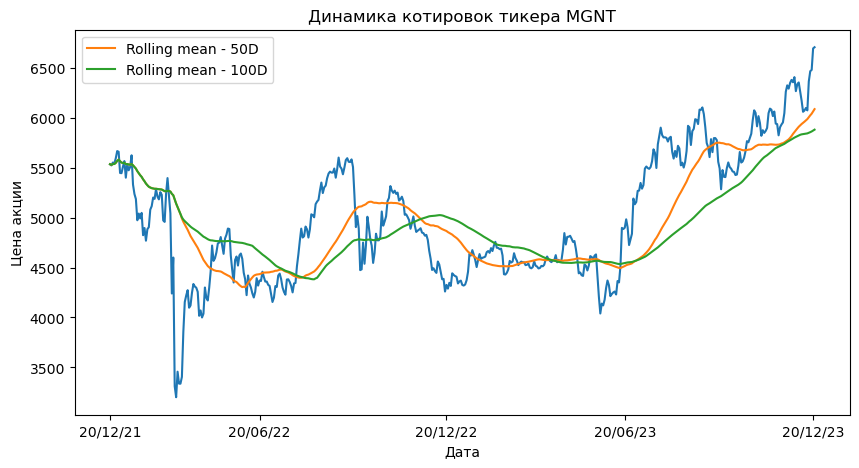

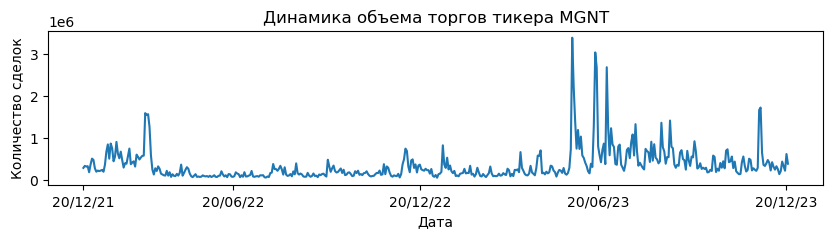

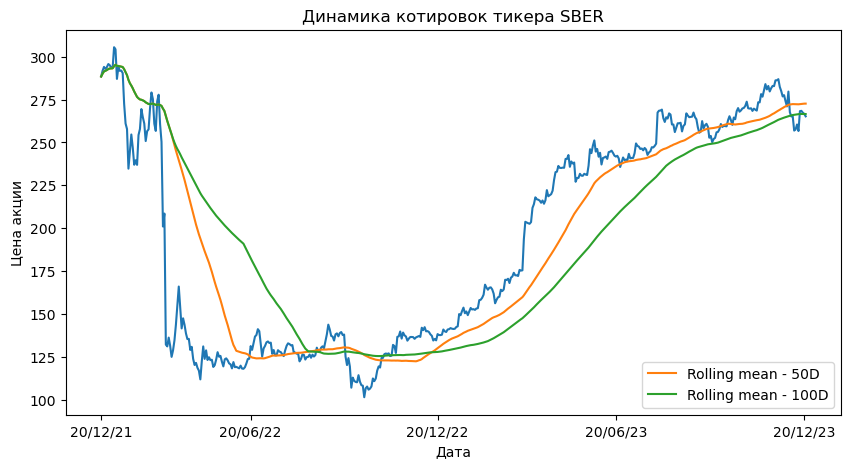

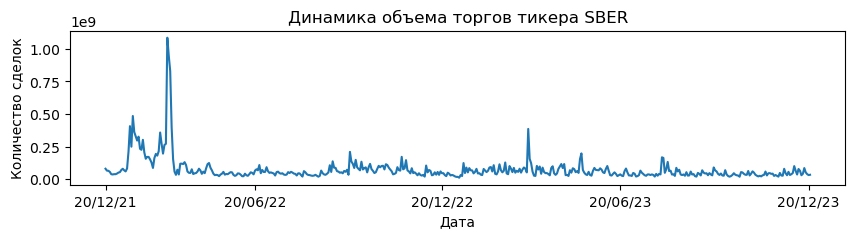

In [15]:
for ticker in tickers:
    ticker_dynamic(ticker)

# 9.10.11

In [16]:
import pandas_ta as pta

In [17]:
def ticker_dynamic_advanced(ticker: str, year: int = None) -> None:
    if year:
        df_ticker = df.loc[(df.TICKER == ticker) & (df.DATE.dt.year == year)]
    else:
        df_ticker = df.loc[df.TICKER == ticker]
    

    plt.figure(figsize=(10,5))
    plt.plot(df_ticker.DATE, df_ticker.CLOSE)
    
    windows = [50]
    for window in windows:
        plt.plot(df_ticker.DATE, df_ticker.CLOSE.rolling(window, min_periods=1).mean(), label=f'Rolling mean - {window}D')
        plt.plot(df_ticker.DATE, df_ticker.CLOSE.ewm(span=50, min_periods=1).mean(), label='Exponential rolling mean - 50D')
    
    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.xlabel('Дата')
    plt.ylabel('Цена акции')
    if year:
        plt.title(f"Динамика котировок тикера {ticker} в {year} году")
    else:
        plt.title(f"Динамика котировок тикера {ticker}")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(10,2))
    plt.plot(df_ticker.DATE, pta.rsi(df_ticker.CLOSE, length = 14))
    plt.plot(df_ticker.DATE, np.full(len(df_ticker), 30), 'r--')
    plt.plot(df_ticker.DATE, np.full(len(df_ticker), 70), 'r--')
    
    plt.xticks(["20/12/21","20/06/22", "20/12/22","20/06/23", "20/12/23"])
    plt.ylim((0,100))
    plt.xlabel('Дата')
    if year:
        plt.title(f"Динамика индикатора RSI тикера {ticker} в {year} году")
    else:
        plt.title(f"Динамика индикатора RSI тикера {ticker}")
    plt.show()

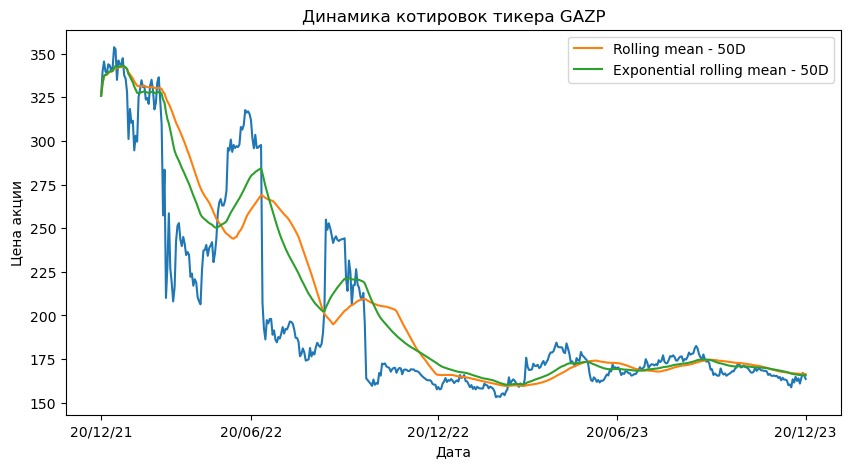

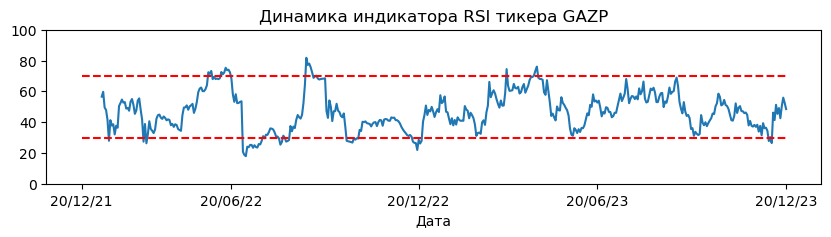

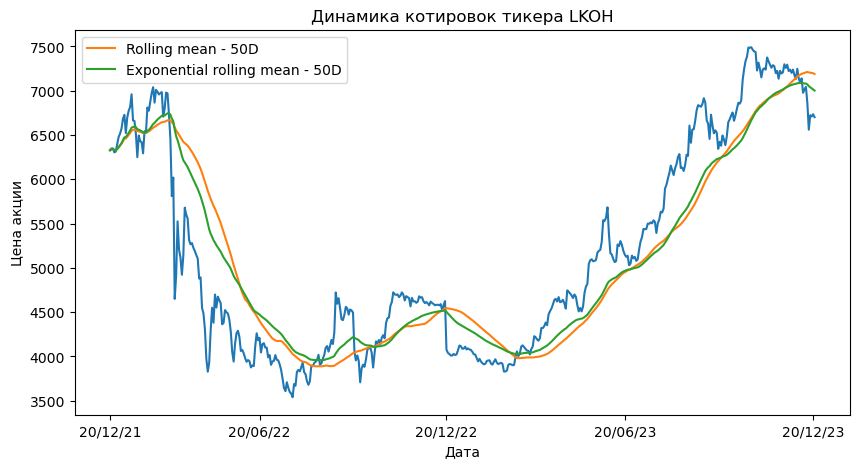

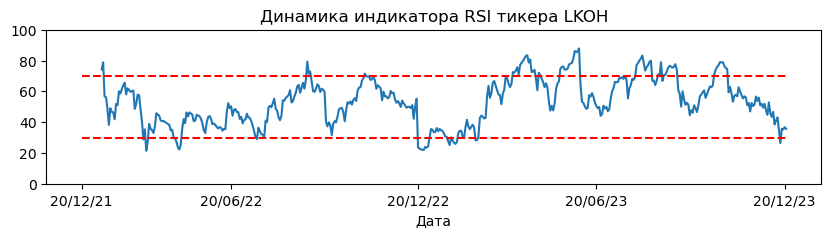

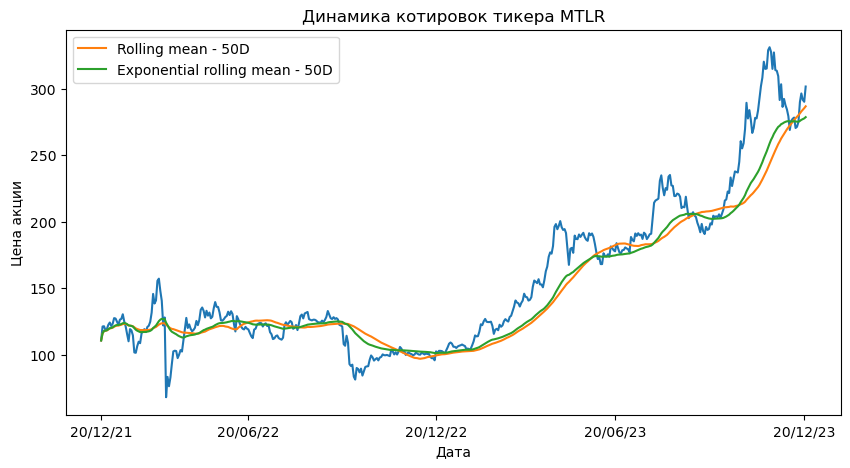

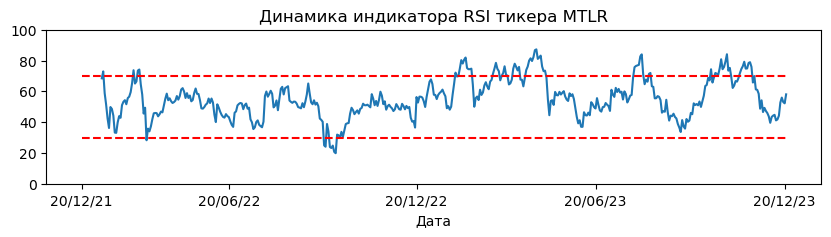

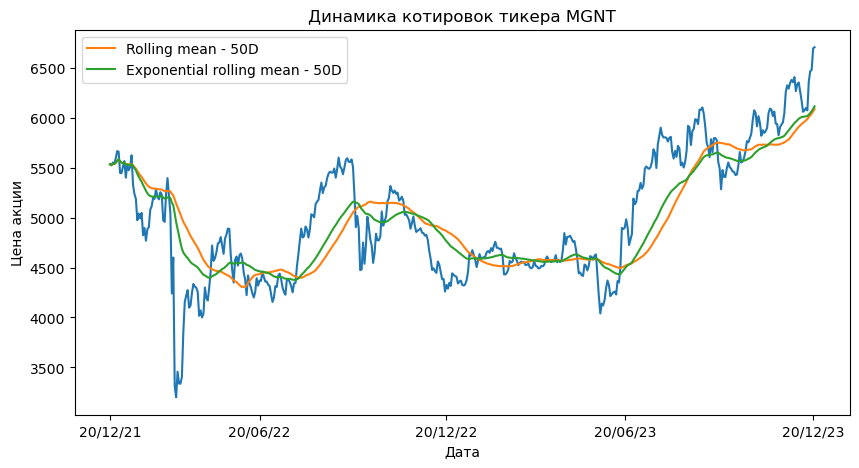

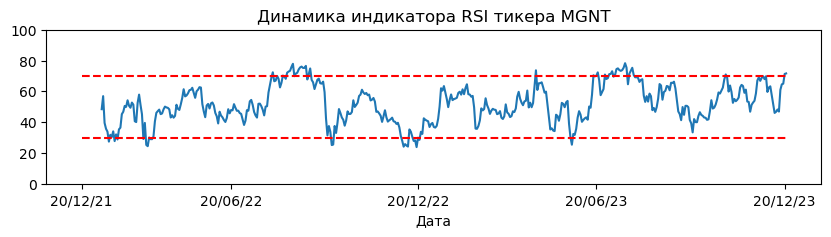

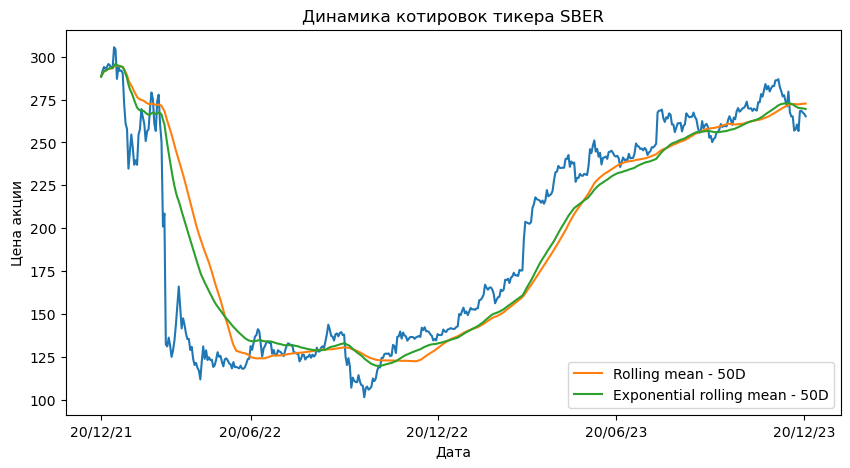

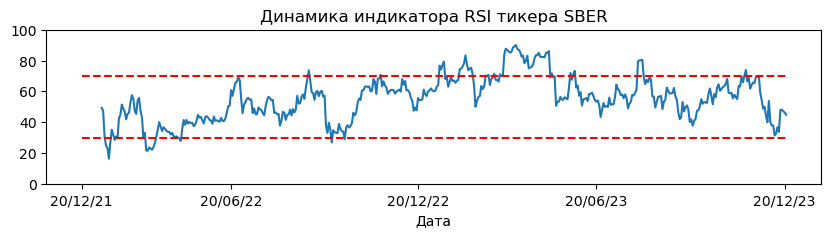

In [18]:
for ticker in tickers:
    ticker_dynamic_advanced(ticker)

Мы добавили экспоненциальную среднюю и нужно пару слов сказать о ней, так экспоненциальная средняя более чувствительна к изменению цены и действительно, если мы обратимся к графикам, то экспоненциальная средняя более четко повторяет силуэт графиков. Плюс минус она похоже на среднюю 50 периода для среднесрочных прогнозов. 
Теперь пару слов об RSI индексе. RSI (от англ. Relative Strength Index) — индекс относительной силы. Это технический индикатор, который используется для оценки уровня перекупленности или перепроданности цен актива. RSI основан на сравнении суммарных повышений и понижений цены за определенный период времени (обычно 14 дней) и генерирует значения от 0 до 100. Значения RSI выше 70 обычно интерпретируются как сигнал перепроданности, а значения ниже 30 — как сигнал перекупленности. RSI помогает трейдерам принимать решения о входе и выходе с рынка.
Самым распространенным и зарекомендовавшим сигналом RSI остается дивергенция. Если цена делает два возрастающих максимума на вершине тренда, а индикатор RSI демонстрирует их снижение, это явный признак, что рост цены замедляется и новый максимум сформировался не столько за счет притока покупателей, сколько из-за отсутствия продавцов.